In [2]:
import pandas as pd 
import os
import glob
import datetime, warnings, scipy 
import numpy as np
import seaborn as sea
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
path = "/Users/xiomaragonzalez/Desktop/train_2019.csv"
data = pd.read_csv(path)
data.head()

,AIRLINE_ID,CARRIER_NAME,ORIGIN_AIRPORT_ID,ORIGIN,ORIGIN_CITY_NAME,PREVIOUS_AIRPORT,LATITUDE,LONGITUDE,MONTH,DAY_OF_MONTH,AIRPORT_FLIGHTS_MONTH,SEGMENT_NUMBER,TAIL_NUM,MANUFACTURE_YEAR,PLANE_AGE,AWND,PRCP,SNOW,TMAX,TAVG,DEST_AIRPORT_ID,DEST,DEST_CITY_NAME,DEPARTING_AIRPORT,CRS_DEP_TIME,DEP_TIME,DEP_DELAY_NEW,CRS_ARR_TIME,ARR_TIME,ARR_DELAY_NEW,CANCELLED,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
0,19805,American Airlines Inc.,14107,PHX,"Phoenix, AZ",NONE,33.436,-112.009,1,20,14576,1,N509AY,2009.0,10,3.36,0.0,NaN,74.0,58.0,13930,ORD,"Chicago, IL",Phoenix Sky Harbor International,800,759.0,0.0,1226,1228.0,2.0,0.0,1440.0,NaN,NaN,NaN,NaN,NaN
1,19393,Southwest Airlines Co.,14107,PHX,"Phoenix, AZ",NONE,33.436,-112.009,1,20,14576,1,N8706W,2017.0,2,3.36,0.0,NaN,74.0,58.0,13232,MDW,"Chicago, IL",Phoenix Sky Harbor International,715,810.0,55.0,1130,1213.0,43.0,0.0,1444.0,43.0,0.0,0.0,0.0,0.0
2,19393,Southwest Airlines Co.,14107,PHX,"Phoenix, AZ",NONE,33.436,-112.009,1,20,14576,1,N469WN,2004.0,15,3.36,0.0,NaN,74.0,58.0,14679,SAN,"San Diego, CA",Phoenix Sky Harbor International,710,703.0,0.0,725,710.0,0.0,0.0,304.0,NaN,NaN,NaN,NaN,NaN
3,19393,Southwest Airlines Co.,14107,PHX,"Phoenix, AZ",NONE,33.436,-112.009,1,20,14576,1,N713SW,1998.0,21,3.36,0.0,NaN,74.0,58.0,14869,SLC,"Salt Lake City, UT",Phoenix Sky Harbor International,755,749.0,0.0,930,914.0,0.0,0.0,507.0,NaN,NaN,NaN,NaN,NaN
4,19393,Southwest Airlines Co.,14107,PHX,"Phoenix, AZ",NONE,33.436,-112.009,1,20,14576,1,N8321D,2012.0,7,3.36,0.0,NaN,74.0,58.0,14771,SFO,"San Francisco, CA",Phoenix Sky Harbor International,1005,1000.0,0.0,1130,1111.0,0.0,0.0,651.0,NaN,NaN,NaN,NaN,NaN


In [92]:
core30 = data['ORIGIN'].unique()
airlines = data['CARRIER_NAME'].unique()
airport_airline_matrix = pd.DataFrame(core30)
airport_airline_matrix.set_index(0, inplace=True)

origin_loc = data[['ORIGIN','ORIGIN_CITY_NAME']]
origin_loc = origin_loc.set_index('ORIGIN')['ORIGIN_CITY_NAME'].to_dict()

for a in airlines:
    data_airline = data[data['CARRIER_NAME'] == a]
    delay_by_origin = data_airline['DEP_DELAY_NEW'].groupby(data['ORIGIN']).mean()
    airport_airline_matrix[a] = delay_by_origin

{'PHX': 'Phoenix, AZ',
 'PHL': 'Philadelphia, PA',
 'EWR': 'Newark, NJ',
 'CLT': 'Charlotte, NC',
 'MDW': 'Chicago, IL',
 'MCO': 'Orlando, FL',
 'SEA': 'Seattle, WA',
 'IAD': 'Washington, DC',
 'JFK': 'New York, NY',
 'SAN': 'San Diego, CA',
 'LGA': 'New York, NY',
 'SFO': 'San Francisco, CA',
 'MEM': 'Memphis, TN',
 'BOS': 'Boston, MA',
 'FLL': 'Fort Lauderdale, FL',
 'TPA': 'Tampa, FL',
 'DCA': 'Washington, DC',
 'DEN': 'Denver, CO',
 'IAH': 'Houston, TX',
 'MIA': 'Miami, FL',
 'LAX': 'Los Angeles, CA',
 'DFW': 'Dallas/Fort Worth, TX',
 'LAS': 'Las Vegas, NV',
 'ORD': 'Chicago, IL',
 'BWI': 'Baltimore, MD',
 'MSP': 'Minneapolis, MN',
 'SLC': 'Salt Lake City, UT',
 'ATL': 'Atlanta, GA',
 'HNL': 'Honolulu, HI',
 'DTW': 'Detroit, MI'}

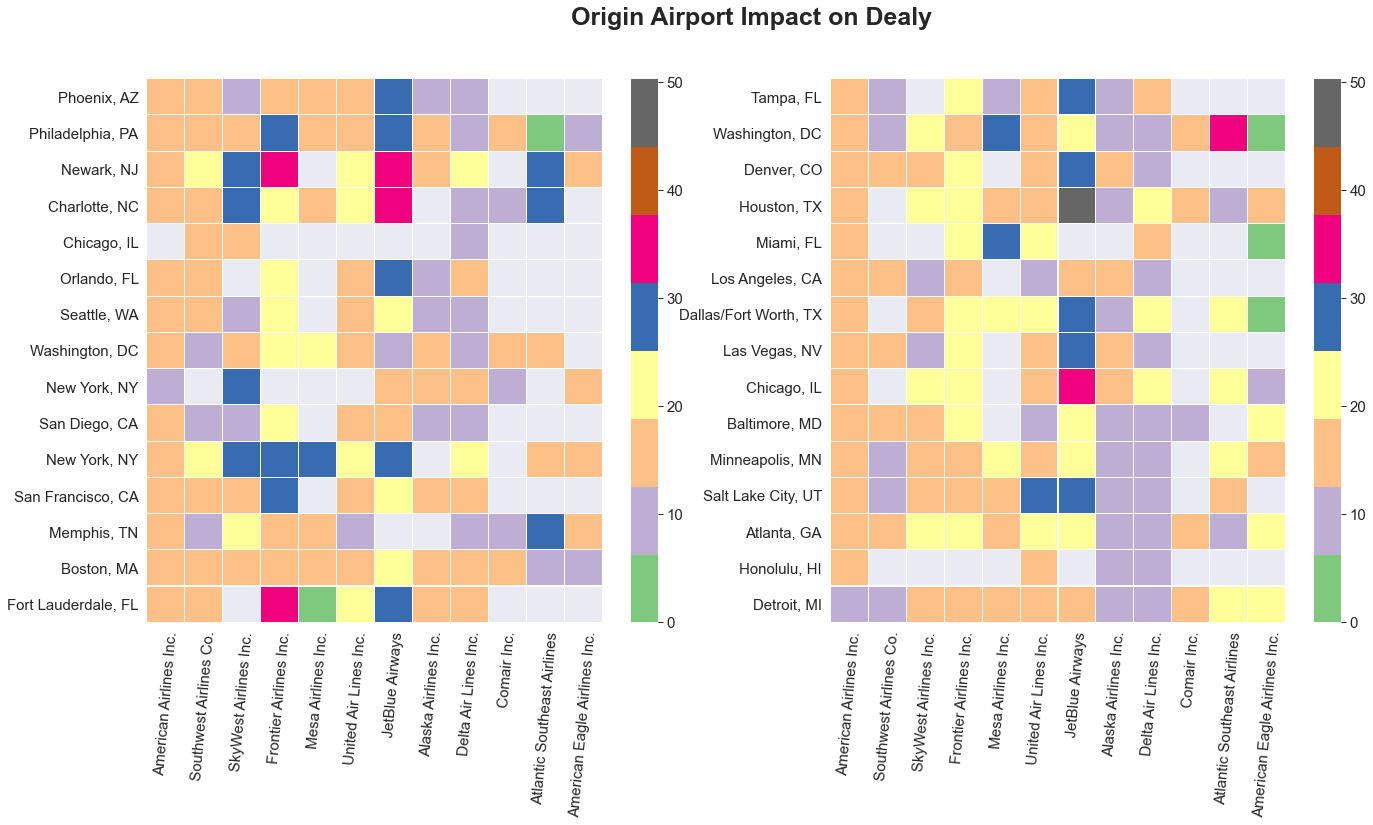

In [104]:
fig = plt.figure(1, figsize = (20,10))
fig.suptitle('Origin Airport Impact on Dealy',fontsize=25,fontweight='semibold')
sea.set(context="paper")

left_airports = airport_airline_matrix.iloc[:15]
left_airports = left_airports.rename(index=origin_loc)
right_airports = airport_airline_matrix.iloc[15:]
right_airports = right_airports.rename(index=origin_loc)
max_delay = airport_airline_matrix.melt().value.max()

ax0 = fig.add_subplot(1,2,1)
sea.heatmap(left_airports, linewidths=0.01, cmap="Accent", vmin=0, vmax=max_delay)
plt.setp(ax0.get_xticklabels(), fontsize=15, rotation=85)
plt.setp(ax0.get_yticklabels(), fontsize=15, rotation=0)
cbar = ax0.collections[0].colorbar
cbar.ax.tick_params(labelsize=15)
ax0.yaxis.label.set_visible(False)

ax1 = fig.add_subplot(1,2,2)
sea.heatmap(right_airports, linewidths=0.01, cmap="Accent", vmin=0, vmax=max_delay)
plt.setp(ax1.get_xticklabels(), fontsize=15, rotation=85)
plt.setp(ax1.get_yticklabels(), fontsize=15, rotation=0)
cbar = ax1.collections[0].colorbar
cbar.ax.tick_params(labelsize=15)
ax1.yaxis.label.set_visible(False)

fig.savefig('origin_airport_heatmap.jpg', format='jpg', bbox_inches='tight',dpi=300,facecolor=fig.get_facecolor(), edgecolor='none')